In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# # Install required libs
# !pip install git+https://github.com/qubvel/segmentation_models.pytorch
# !pip install albumentations==0.4.6

In [3]:
# !sudo rm -rf /content/seg_recyclables
# !git clone https://github.com/finani/seg_recyclables.git

# import sys
# sys.path.append('/content/seg_recyclables')

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print('')

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

print('')

import os
import torch
print('Pytorch version: {}'.format(torch.__version__))
print('Is GPU available: {}'.format(torch.cuda.is_available()))
if torch.cuda.is_available():
  print(torch.cuda.get_device_name(0))
  print('The number of GPUs available: {}'.format(torch.cuda.device_count())) # Tesla P100-PCIE-16GB
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print('CPU count: {}'.format(os.cpu_count()))  # 8

cuda = torch.version.cuda
cudnn = torch.backends.cudnn.version()
cudnn_major = cudnn // 1000
cudnn = cudnn % 1000
cudnn_minor = cudnn // 100
cudnn_patch = cudnn % 100
print('Cuda version: {}'.format(cuda)) # 11.1
print('Cudnn version: {}.{}.{}'.format(cudnn_major, cudnn_minor, cudnn_patch)) # 8.0.5


Mon Dec 27 23:54:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.86       Driver Version: 470.86       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| N/A   48C    P5    20W /  N/A |    569MiB /  7982MiB |     36%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Inference Binary Segmentation
Classes =  ['Background', 'UNKNOWN', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']

## Configures

In [5]:
import os
import sys

import torch
import numpy as np
import pandas as pd

import wandb
import matplotlib.pyplot as plt
import albumentations as A

import Utils
from ModelManager import ModelManager
from DataManager import DataManager, CustomDataset, CustomAugmentation
from InferManager import InferManager

project_dir = '/home/weebee/recyclables/baseline'
dataset_dir = os.path.join(project_dir, 'input')
save_dir = os.path.join(project_dir, 'saved/test_1')
if not os.path.isdir(dataset_dir):
    sys.exit('check dataset path!!')
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

config_dict = {
    'project_name': 'test',
    'run_name': '[IM] All Binary Classes',
    'network': 'DeepLabV3Plus',
    'encoder': 'resnet101',
    'encoder_weights': 'imagenet',
    'activation': None,
    'multi_gpu': False,
    'batch_size': 30,
    'learning_rate': 1e-4,
    'number_worker': 4,
    'note': 'test infer'
}

transform = CustomAugmentation.to_tensor_transform()

In [6]:
# Make Model for binary segmentation
model_manager = ModelManager()
model = model_manager.make_deeplabv3plus_model(
    encoder=config_dict['encoder'],
    encoder_weights=config_dict['encoder_weights'],
    class_number=2,
    activation=config_dict['activation'],
    multi_gpu=config_dict['multi_gpu']
)

# Load Dataset
data_manager = DataManager(dataset_path=dataset_dir)
test_dataset = CustomDataset(
    dataset_dir=data_manager.dataset_path,
    json_file_name='test.json',
    mode='test',
    transform=CustomAugmentation.to_tensor_transform()
)
test_data_loader = data_manager.make_data_loader(
    dataset=test_dataset,
    batch_size=config_dict['batch_size'],
    shuffle=False,
    number_worker=config_dict['number_worker'],
    drop_last=False
)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


## Make Submission


	Class: UNKNOWN



100%|██████████| 28/28 [02:17<00:00,  4.91s/it, file_name=batch_03/0785.jpg]



	Class: General trash



100%|██████████| 28/28 [02:22<00:00,  5.07s/it, file_name=batch_03/0785.jpg]



	Class: Paper



100%|██████████| 28/28 [02:22<00:00,  5.08s/it, file_name=batch_03/0785.jpg]



	Class: Paper pack



100%|██████████| 28/28 [02:22<00:00,  5.09s/it, file_name=batch_03/0785.jpg]



	Class: Metal



100%|██████████| 28/28 [02:21<00:00,  5.04s/it, file_name=batch_03/0785.jpg]



	Class: Glass



100%|██████████| 28/28 [02:20<00:00,  5.01s/it, file_name=batch_03/0785.jpg]



	Class: Plastic



100%|██████████| 28/28 [02:22<00:00,  5.10s/it, file_name=batch_03/0785.jpg]



	Class: Styrofoam



100%|██████████| 28/28 [02:20<00:00,  5.02s/it, file_name=batch_03/0785.jpg]



	Class: Plastic bag



100%|██████████| 28/28 [02:19<00:00,  5.00s/it, file_name=batch_03/0785.jpg]



	Class: Battery



100%|██████████| 28/28 [02:18<00:00,  4.93s/it, file_name=batch_03/0785.jpg]



	Class: Clothing



100%|██████████| 28/28 [02:14<00:00,  4.79s/it, file_name=batch_03/0785.jpg]


[812 347 560  82 417]


NameError: name 'dataset_dir' is not defined

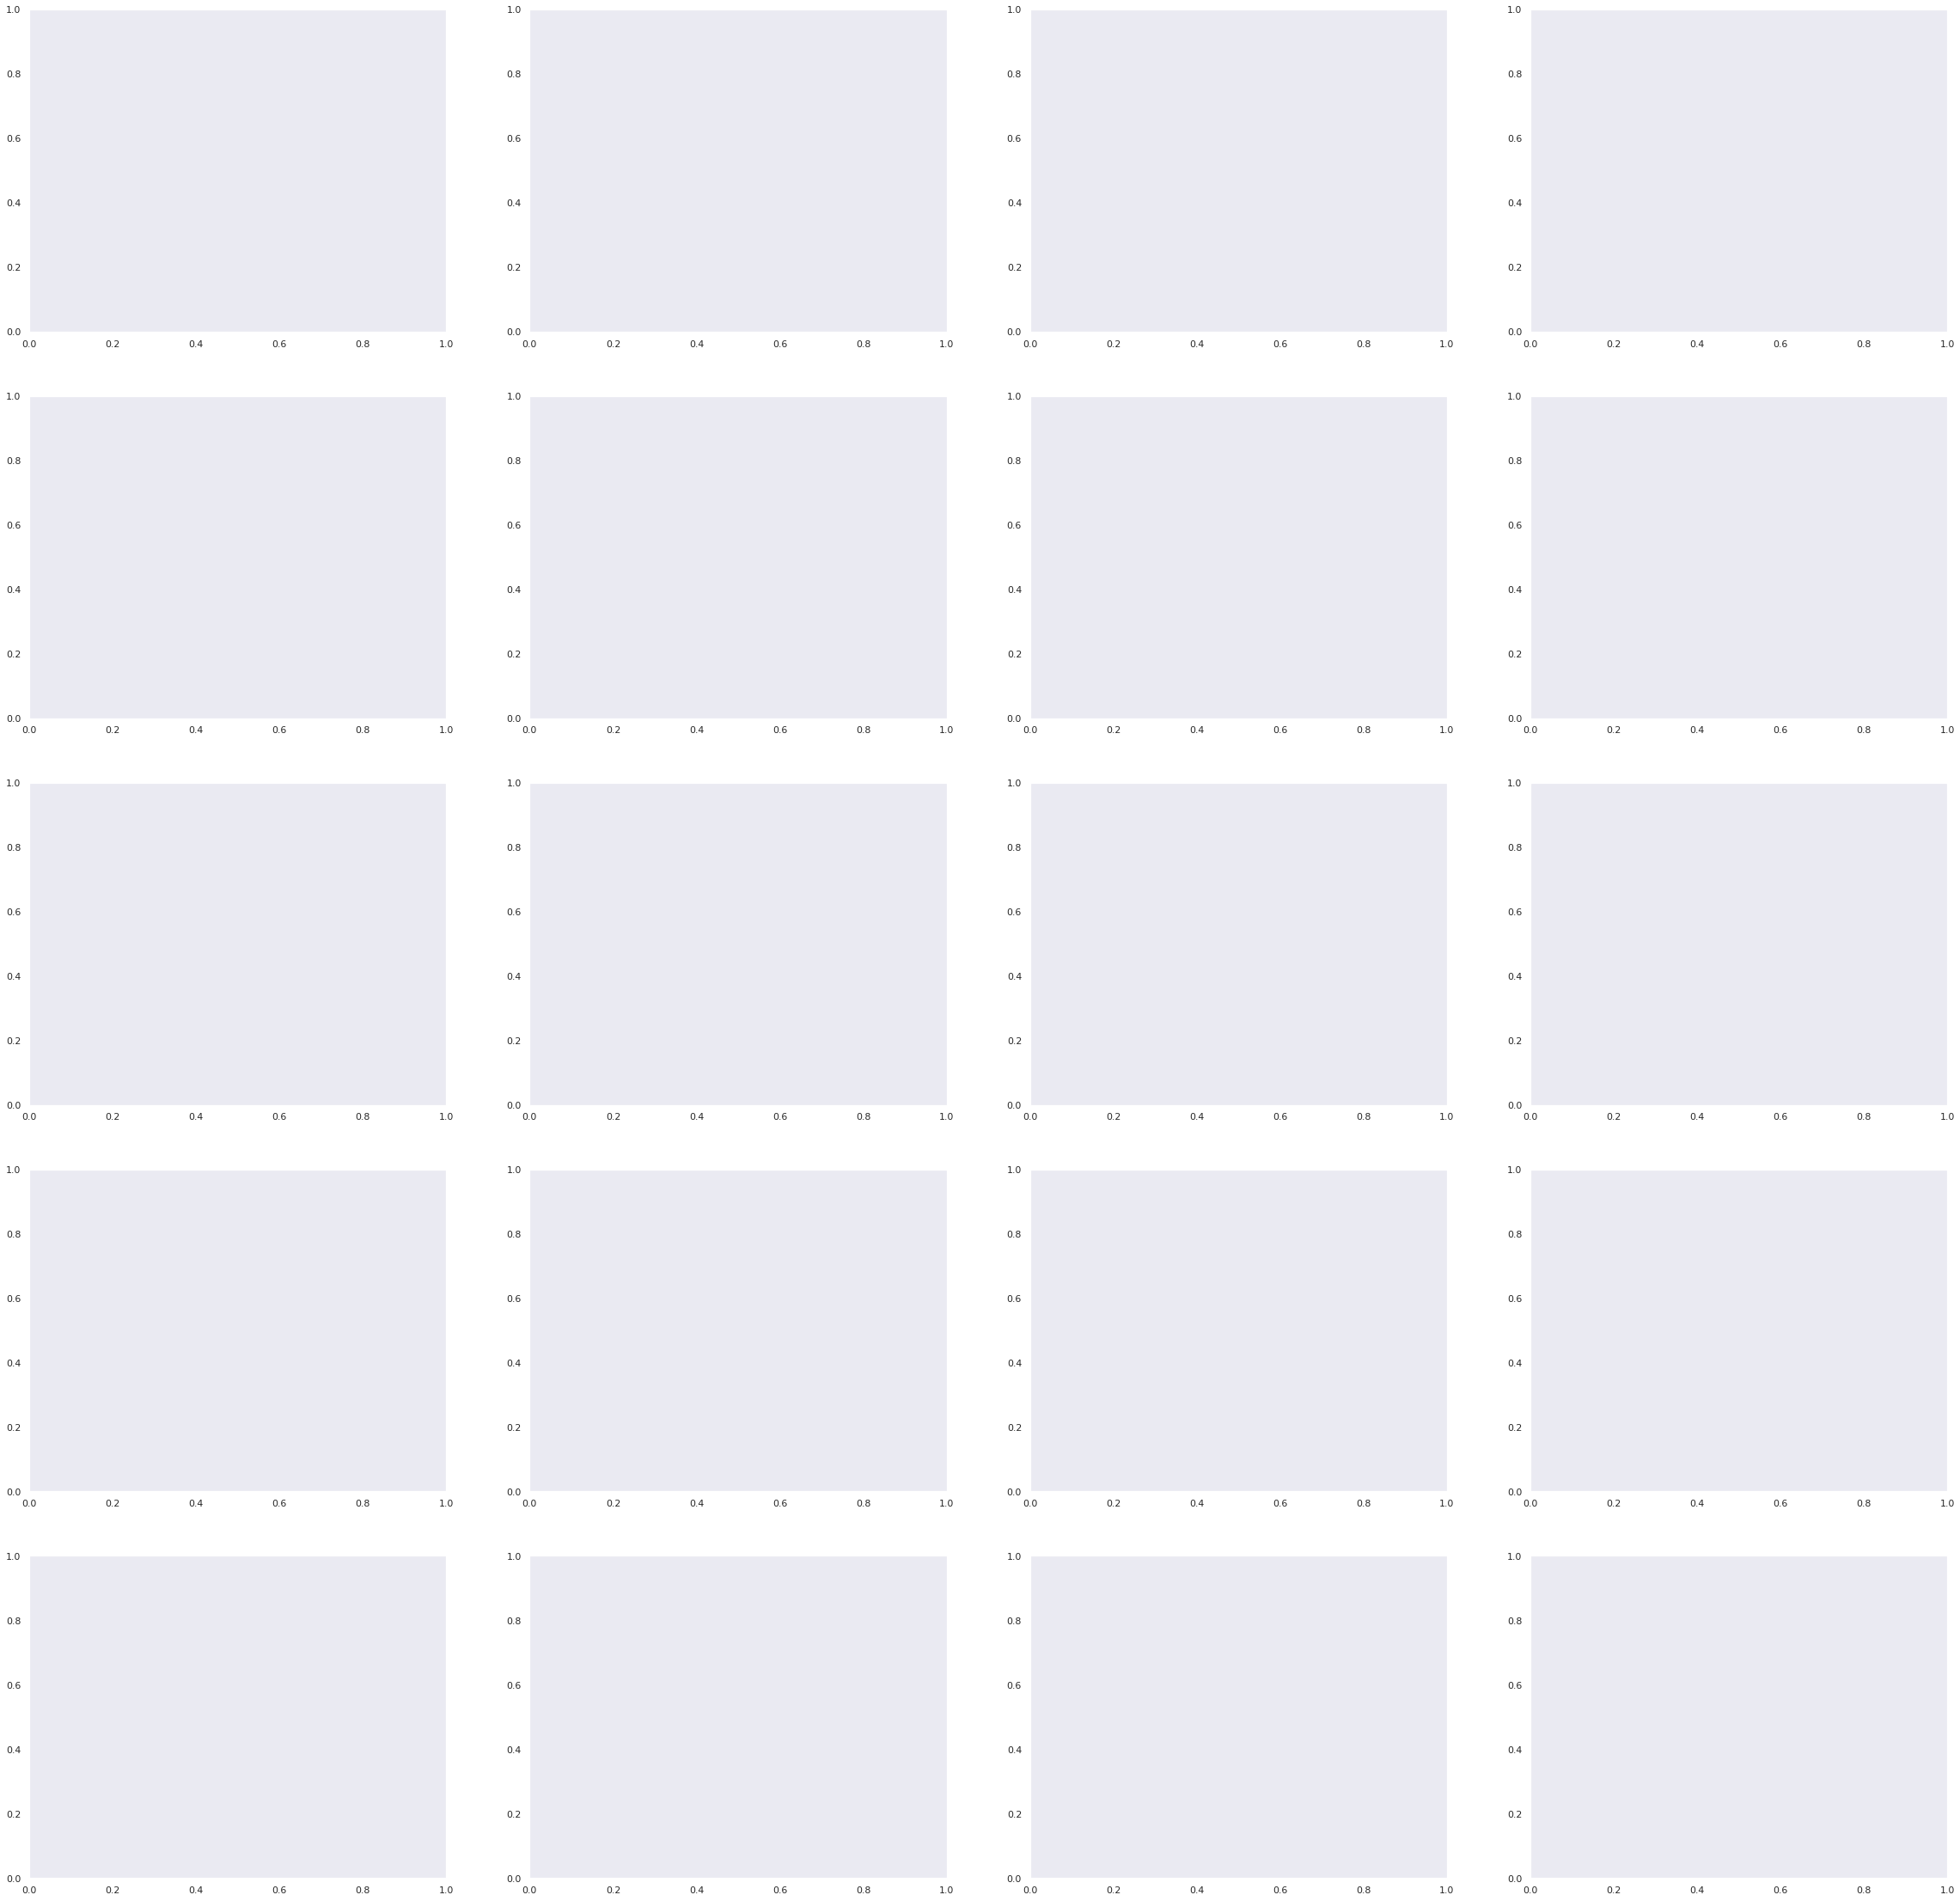

In [7]:
# Make Submission for binary segmentation
infer_manager = InferManager()
infer_manager.make_submission_binary(
    model=model,
    test_data_loader=test_data_loader,
    dataset_dir=dataset_dir,
    save_dir=save_dir,
    submission_file_name='submission.csv',
    threshold_bg=0.5
)

In [ ]:
# preds_list = []
# file_names_list = []
# for class_name in Utils.get_classes()[1:]:
#     print("\n\tClass: {}\n".format(class_name))

#     # Load Weights
#     model = infer_manager.load_saved_model_weight(
#         model=model,
#         save_dir=save_dir,
#         model_file_name='best_model_target_' + class_name.lower() + '.pt'
#     )

#     # inference
#     file_names, preds = infer_manager.run_test(
#         model=model,
#         data_loader=test_data_loader,
#         binary_segmentation=True
#     )  # output=logits, file_number=837, [file_number,size*size]=[837, 65536]
#     # output=logits [class_number=11, file_number=837, size*size]
#     preds_list.append(preds/255.0)
#     file_names_list.append(file_names)

In [ ]:
# print(len(file_names_list)) # 11, 837
# print(len(file_names_list[0]))
# print(len(preds_list))
# preds_np = np.array(preds_list)

# for idx in range(12):
#   print(file_names_list[idx][43])

In [ ]:
# # [class_number, file_number, size*size] = [11, 837, 65536]
# preds_np = np.array(preds_list)
# # [file_number, size*size] = [837, 65536]
# preds_fg = np.argmax(preds_np, axis=0) + 1
# preds_bg_temp = np.where(preds_np > 0.5, 1, 0)
# preds_bg = np.where(np.sum(preds_bg_temp, axis=0) == 0, 1, 0)
# preds = (1-preds_bg) * preds_fg



# print(file_names.index('batch_01_vt/0584.jpg'))
# for idx in range(11):
#     print(file_names_list[idx][43])
#     plt.imshow(preds_np[idx][43].reshape(256,256))
#     plt.savefig('/home/weebee/recyclables/baseline/saved/trash/preds_np_' + str(idx) + '.png')
#     im = plt.imshow(preds_bg_temp[idx][43].reshape(256,256), cmap='gray')
#     plt.savefig('/home/weebee/recyclables/baseline/saved/trash/preds_bg_temp_' + str(idx) + '.png')
# im = plt.imshow(preds_fg[43].reshape(256,256), cmap='gray')
# plt.colorbar(im)
# plt.savefig('/home/weebee/recyclables/baseline/saved/trash/preds_fg.png')
# im = plt.imshow(preds_bg[43].reshape(256,256), cmap='gray')
# plt.savefig('/home/weebee/recyclables/baseline/saved/trash/preds_bg.png')
# im = plt.imshow(preds[43].reshape(256,256), cmap='gray')
# plt.savefig('/home/weebee/recyclables/baseline/saved/trash/preds.png')

# # fig, (ax11, ax12, ax13, ax14) = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))

# # # Original image
# # # [class_number=0, file_number=idx
# # im11 = ax11.imshow(preds_np[2][0].reshape(256, 256), cmap='gray')
# # ax11.grid(False)
# # ax11.set_title("Original image : {}".format(
# #     file_names[723]), fontsize=15)
# # plt.colorbar(mappable=im11, ax=ax11)

# # # Predicted forground
# # im12 = ax12.imshow(preds_fg[0].reshape(256, 256), cmap='gray')
# # ax12.grid(False)
# # ax12.set_title("Predicted : {}".format(
# #     file_names[723]), fontsize=15)
# # plt.colorbar(mappable=im12, ax=ax12)

# # # Predicted background
# # im13 = ax13.imshow(preds_bg[0].reshape(256, 256), cmap='gray')
# # ax13.grid(False)
# # ax13.set_title("Predicted : {}".format(
# #     file_names[723]), fontsize=15)
# # plt.colorbar(mappable=im13, ax=ax13)

# # # Predicted image
# # im14 = ax14.imshow(preds[0].reshape(256, 256), cmap='gray')
# # ax14.grid(False)
# # ax14.set_title("Predicted : {}".format(
# #     file_names[723]), fontsize=15)
# # plt.colorbar(mappable=im14, ax=ax14)

In [ ]:

# import matplotlib.image as img

# for img_idx in range(5):
#     file_number = np.random.choice(len(preds), 5) # 837, 5
#     print(file_number)

#     fig, axs = plt.subplots(nrows=len(file_number), ncols=4, figsize=(40, 40))
#     font_size = 20
#     for idx in range(len(file_number)):
#         # Original image
#         im1 = axs[idx][0].imshow(img.imread(os.path.join(dataset_dir, file_names_list[idx][file_number[idx]])))
#         axs[idx][0].grid(False)
#         axs[idx][0].set_title("Original image : {}".format(
#             file_names_list[idx][file_number[idx]]), fontsize=font_size)
#         plt.colorbar(mappable=im1, ax=axs[idx][0])

#         # Predicted forground
#         im2 = axs[idx][1].imshow(preds_fg[file_number[idx]].reshape(256, 256), cmap='gray')
#         axs[idx][1].grid(False)
#         axs[idx][1].set_title("foreground only : {}".format(
#             file_names_list[idx][file_number[idx]]), fontsize=font_size)
#         plt.colorbar(mappable=im2, ax=axs[idx][1])

#         # Predicted background
#         im3 = axs[idx][2].imshow(preds_bg[file_number[idx]].reshape(256, 256), cmap='gray')
#         axs[idx][2].grid(False)
#         axs[idx][2].set_title("background only : {}".format(
#             file_names_list[idx][file_number[idx]]), fontsize=font_size)
#         plt.colorbar(mappable=im3, ax=axs[idx][2])

#         # Predicted image
#         im4 = axs[idx][3].imshow(preds[file_number[idx]].reshape(256, 256), cmap='gray')
#         axs[idx][3].grid(False)
#         axs[idx][3].set_title("Predicted : {}".format(
#             [{int(class_number), Utils.get_classes()[
#                       int(class_number)]} for class_number in list(np.unique(preds[file_number[idx]]))]), fontsize=font_size)
#         plt.colorbar(mappable=im4, ax=axs[idx][3])

#     fig_name = os.path.join(save_dir, 'submission_' + str(img_idx) + '.png')
#     plt.savefig(fig_name)
#     plt.show()

In [ ]:
# submission = pd.DataFrame()
# submission['image_id'] = file_names
# submission['PredictionString'] = [
#     ' '.join(str(e) for e in string.tolist()) for string in preds]

# # save submission.csv
# submission_path = os.path.join(save_dir, 'submission.csv')
# submission.to_csv(submission_path, index=False)